In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#y_Test = pd.read_csv('gender_submission.csv') this is sample submission csv

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.shape ,test.shape

((891, 12), (418, 11))

In [9]:
#del train['Ticket']

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From above, the test data has Age column missing 177 values, Embarked column missing 2 values and Cabin columnn missing 687 values, also the test data has Age column missing 86 values, fare cabin missing 1 value and Cabin column missing 327 values.

In [12]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

# 2D Scatter Plot

In [14]:
pp.ProfileReport(train)

In [15]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

From above we can say that women are more likely to survive then men.

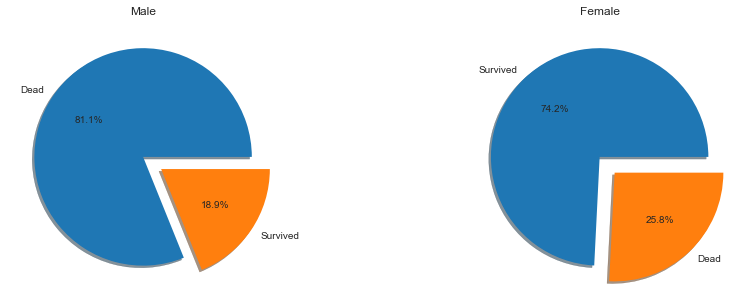

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize =(15,5))
men = train['Survived'][train['Sex']=='male'].value_counts()
female = train['Survived'][train['Sex'] =='female'].value_counts()
label = ['Dead' , 'Survived']
ax1.pie(men, explode=[0,0.2] ,labels =label ,autopct ='%1.1f%%',  shadow= True)
ax1.set_title('Male')
ax2.pie(female , explode=[0,0.2], labels =label[::-1], autopct='%1.1f%%',  shadow=True)
ax2.set_title('Female')
plt.show()

From the pie chart, it's confermed more females survived then men.

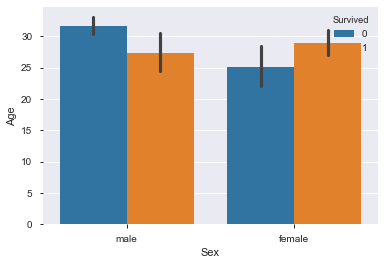

In [17]:
sns.barplot(x=train.Sex , y=train.Age , hue =train.Survived)

In [18]:
def bar_chart(feature):
    sns.barplot(x=train['Sex'] , y=train[feature], hue=train['Survived'])

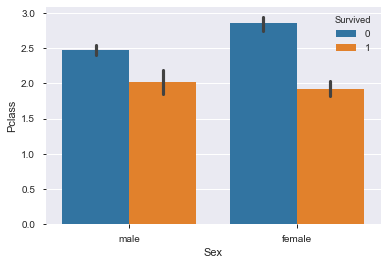

In [19]:
bar_chart('Pclass')

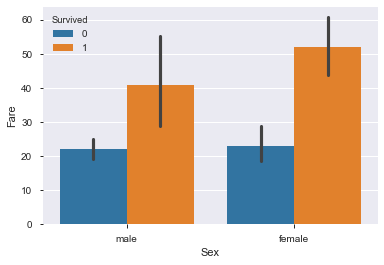

In [20]:
sns.barplot(x=train['Sex'] , y=train['Fare'], hue=train['Survived'])

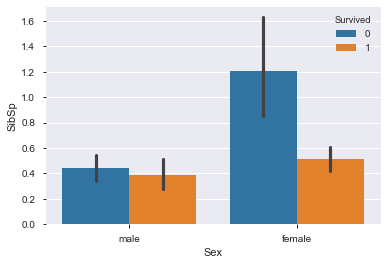

In [21]:
sns.barplot(x=train['Sex'] , y=train['SibSp'], hue=train['Survived'])

In [22]:
def bar_graph(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar' ,figsize=(12,6))

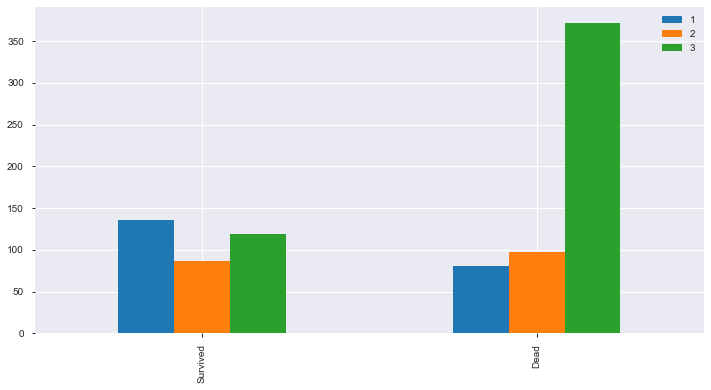

In [23]:
bar_graph('Pclass')

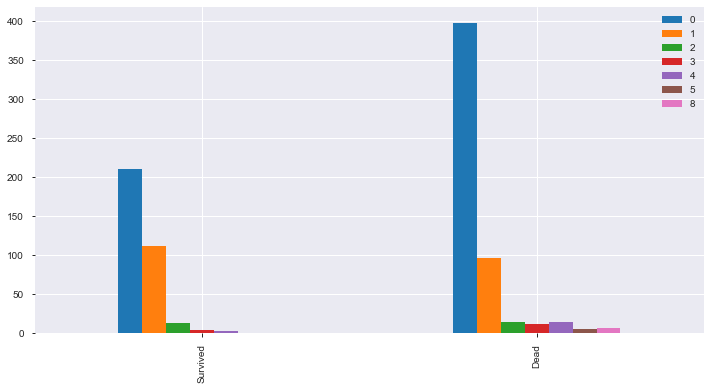

In [24]:
bar_graph('SibSp')

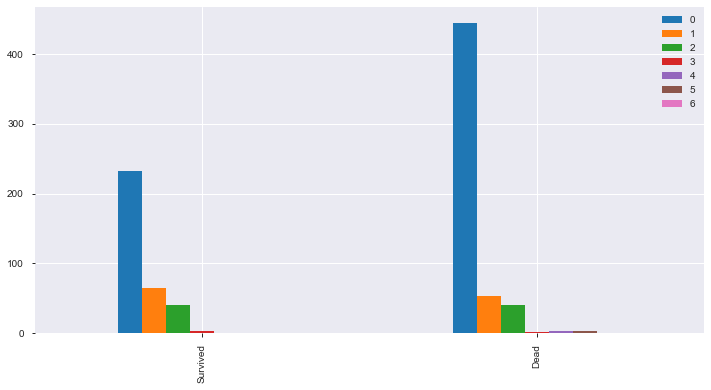

In [25]:
bar_graph('Parch')

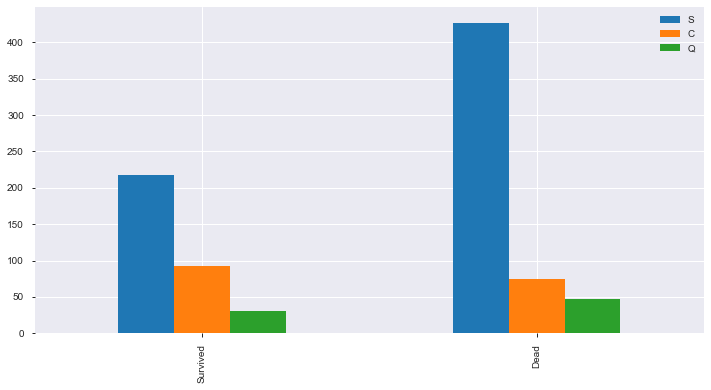

In [26]:
bar_graph('Embarked')

In [27]:
corr_matx = train.corr()

In [28]:
corr_matx['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## New Features

In [29]:
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) 
test['title'] = test.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False) 

In [30]:
train['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Ms.            1
Lady.          1
Sir.           1
Capt.          1
Jonkheer.      1
Mme.           1
Don.           1
Name: title, dtype: int64

In [31]:
train_dict = dict(train['title'].value_counts())
test_dict = dict(test['title'].value_counts())

In [32]:
title1 = train['title'].tolist()
title2 = test['title'].tolist()
name_list = []
name_list2 = []

for x in title1:
    name= train_dict.get(x)
    if name is None or name <= 20:
        name_list.append('other')
    else:
        name_list.append(x)

for x in title2:
    name = train_dict.get(x)
    if name is None or name <= 20:
        name_list2.append('other')
    else:
        name_list2.append(x)

In [33]:
train['titles'] = name_list
test['titles'] = name_list2

In [34]:
train.replace({'Sex':{'male':0, 'female':1 }} ,inplace = True)
test.replace({'Sex':{'male':0 ,'female':1}}, inplace =True)

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            1
titles           0
dtype: int64

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
titles           0
dtype: int64

In [37]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("titles")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("titles")["Age"].transform("median"), inplace=True)

In [38]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,titles


In [39]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,titles


# Filling missing values in Embarked Column

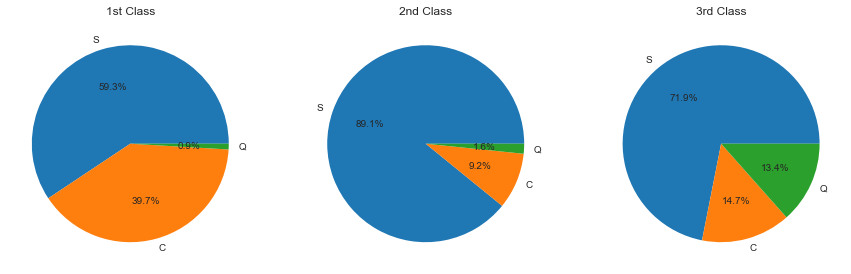

In [40]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1,3, figsize= (15,5))
class_1 = train['Embarked'][train['Pclass'] == 1].value_counts()
class_2 = train['Embarked'][train['Pclass'] == 2].value_counts()
class_3 = train['Embarked'][train['Pclass'] == 3].value_counts()
t = train['Embarked'].value_counts()
label = t.index.values
ax1.set_title('1st Class')
ax1.pie(class_1 ,labels = label , autopct='%1.1f%%')
ax2.set_title('2nd Class')
ax2.pie(class_2 ,labels= label ,autopct='%1.1f%%')
ax3.set_title('3rd Class')
ax3.pie(class_3 ,labels = label, autopct='%1.1f%%')
plt.show()

We can say that from every class most of the people embarked from S port

In [41]:
train['Embarked'].fillna('S', inplace =True)
test['Embarked'].fillna('S', inplace =True)

In [42]:
train['FamilySize'] = train['SibSp']+train['Parch']
test['FamilySize'] = test['SibSp']+test['Parch']

In [43]:
bins = [0,15,30,45,60,100]
labels = [1,2,3,4,5]
Ages_1 = pd.cut(train['Age'],bins , labels = labels)
Ages_2 = pd.cut(test['Age'], bins, labels = labels)

In [44]:
one_hot_4 = pd.get_dummies(Ages_1)
one_hot_5 = pd.get_dummies(Ages_2)

In [45]:
train = train.join(one_hot_4)
test = test.join(one_hot_5)

In [46]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [47]:
train.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
             'title',      'titles',  'FamilySize',             1,
                   2,             3,             4,             5],
      dtype='object')

In [48]:
test.columns

Index(['PassengerId',      'Pclass',        'Name',         'Sex',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',    'Embarked',       'title',
            'titles',  'FamilySize',             1,             2,
                   3,             4,             5],
      dtype='object')

# One Hot encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
x1 = train[['Pclass','Sex', 'Embarked', 'titles']]
x2 = test[['Pclass','Sex', 'Embarked', 'titles']]

In [51]:
one_hot = OneHotEncoder(sparse= False)

In [52]:
feat = one_hot.fit(x1)
x_1 = feat.transform(x1)
x_2 = feat.transform(x2)

In [53]:
feat.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x1_0', 'x1_1', 'x2_C', 'x2_Q', 'x2_S',
       'x3_Master.', 'x3_Miss.', 'x3_Mr.', 'x3_Mrs.', 'x3_other'],
      dtype=object)

In [54]:
column1 =  train[['FamilySize', 1, 2, 3, 4, 5]].values
column2 =  test[['FamilySize', 1, 2, 3, 4, 5]].values

In [55]:
column2.shape

(418, 6)

In [56]:
final = np.column_stack((x_1,column1))
Test = np.column_stack((x_2,column2))
target = train.pop('Survived')

In [57]:
print(final.shape, Test.shape)

(891, 19) (418, 19)


## Mode Testing

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Test Train Split

In [59]:
xTrain , xTest , yTrain , yTest = train_test_split(final, target , test_size = 0.3)

In [60]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 1.1 Navie Bayes

In [88]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, xTrain, yTrain, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.74157303 0.80898876 0.7752809  0.76404494 0.78651685
 0.76404494 0.80898876 0.79775281 0.79775281]


In [68]:
alpha = {}
indx = 1
a = 0
MSE= []
a = 10**-2
while a < 10**2:
    NB = MultinomialNB(alpha = a , class_prior=None , fit_prior=True)
    scores = cross_val_score(NB, xTrain, yTrain, cv =k_fold , scoring='accuracy')
    error = 1 - scores.mean()
    MSE.append(error)
    alpha[error] = a
    a+=0.05
    indx  += 1

opt_alpha = alpha.get(min(MSE))
print('The optimal value of  alpha is {}' .format(round(opt_alpha,3)))

The optimal value of  alpha is 94.76


In [30]:
opt_alpha = 0.21

In [69]:
# Naive Bayes with Optimal alpha
multiNB = MultinomialNB(alpha =opt_alpha, class_prior=None , fit_prior=True)
multiNB.fit(xTrain, yTrain)
pred = multiNB.predict(xTest)

In [70]:
acc = accuracy_score(yTest, pred) * 100
prec = precision_score(yTest, pred)  *100
f1 = f1_score(yTest, pred) *100
conf = confusion_matrix(yTest,pred)

In [71]:
print('The accuracy is {} , Precision is {} and F1 score is {}' .format(acc, prec, f1) , '\n confusion matrix is\n {}' .format(conf)  )

The accuracy is 82.08955223880598 , Precision is 88.1578947368421 and F1 score is 73.62637362637363 
 confusion matrix is
 [[153   9]
 [ 39  67]]


In [72]:
table_b = PrettyTable()
table_b.add_column('Optimal Alpha' , [round(opt_alpha,5)])
table_b.add_column('Accuracy', [round(acc,5)])
table_b.add_column('Precision', [round(prec,5)])
table_b.add_column('f1 score', [round(f1,5)])
print(table_b)

+---------------+----------+-----------+----------+
| Optimal Alpha | Accuracy | Precision | f1 score |
+---------------+----------+-----------+----------+
|     94.76     | 82.08955 |  88.15789 | 73.62637 |
+---------------+----------+-----------+----------+


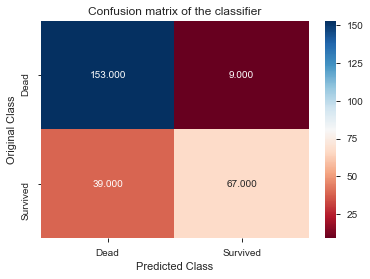

In [73]:
Labels = ['Dead' , 'Survived']
plt.title('Confusion matrix of the classifier')
sns.heatmap(conf, annot=True, cmap='RdBu', fmt=".3f", xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [34]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })

In [43]:
submission['Survived'][5]

0

In [36]:
submission['Survived'].value_counts()

0    256
1    162
Name: Survived, dtype: int64

In [38]:
yTest.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [55]:
sub = pd.read_csv('submission.csv')

In [99]:
submission.to_csv('submission.csv', index = False)

## Logistic Reggression

In [53]:
c_dist =  {'C':stats.uniform(10**-3, 10**2)}
clf = RandomizedSearchCV(LogisticRegression(penalty='l1', class_weight = 'balanced'), c_dist, n_iter=1000, scoring= 'accuracy', cv =k_fold, return_train_score = True)

In [76]:
alpha = {}
indx = 1
a = 0
MSE= []
a = 10**-2
while a < 10**2:
    clf = LogisticRegression(C=a, penalty='l1', class_weight = 'balanced', solver = 'liblinear' , max_iter =500)
    scores = cross_val_score(clf, xTrain, yTrain, cv =k_fold , scoring='accuracy')
    error = 1 - scores.mean()
    MSE.append(error)
    alpha[error] = a
    a+=0.05
    indx  += 1

opt_alpha = alpha.get(min(MSE))
print('The optimal value of  alpha is {}' .format(round(opt_alpha,3)))

The optimal value of  alpha is 99.96


In [77]:
clf.fit(xTrain ,yTrain)
print(clf.best_estimator_)
print(clf.score(xTrain, yTrain))

AttributeError: 'LogisticRegression' object has no attribute 'best_estimator_'

In [79]:
clf = LogisticRegression(C=opt_alpha, penalty = 'l1', class_weight = 'balanced', solver = 'liblinear' , max_iter =500)
clf.fit(xTrain, yTrain)
pred= clf.predict(xTest)

In [55]:
results = clf.cv_results_ 
result_ = pd.DataFrame.from_dict(results)
result_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.050535,0.019468,0.0000,0.000000,55.9935,{'C': 55.993516199507624},0.877778,0.786517,0.808989,0.808989,...,0.825436,0.815461,0.820449,0.822943,0.816708,0.817955,0.812968,0.817955,0.818805,0.004088
1,0.028127,0.022963,0.0000,0.000000,73.0871,{'C': 73.08713090812498},0.877778,0.786517,0.808989,0.808989,...,0.825436,0.814214,0.820449,0.822943,0.816708,0.817955,0.812968,0.817955,0.818680,0.004206
2,0.032623,0.010788,0.0001,0.000300,84.3525,{'C': 84.35245816530578},0.877778,0.786517,0.808989,0.808989,...,0.825436,0.814214,0.820449,0.822943,0.816708,0.817955,0.812968,0.817955,0.818680,0.004206
3,0.011567,0.007793,0.0001,0.000300,13.8339,{'C': 13.833930470903514},0.877778,0.786517,0.808989,0.808989,...,0.825436,0.815461,0.820449,0.822943,0.816708,0.817955,0.812968,0.815461,0.818555,0.004207
4,0.044299,0.023212,0.0003,0.000459,59.2585,{'C': 59.25852057546377},0.877778,0.786517,0.808989,0.808989,...,0.825436,0.815461,0.820449,0.822943,0.816708,0.817955,0.812968,0.817955,0.818805,0.004088


In [80]:
result_ = result_.sort_values('param_C')
test_score = list(result_.mean_test_score)
train_score = list(result_.mean_train_score)
param = list(result_.param_C)

NameError: name 'result_' is not defined

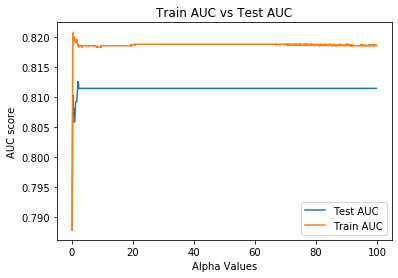

In [57]:
plt.title('Train AUC vs Test AUC')
plt.xlabel('Alpha Values')
plt.ylabel('AUC score')
plt.plot(param,test_score)
plt.plot(param, train_score)
plt.legend(['Test AUC', 'Train AUC'])
plt.show()

In [61]:
opt_alpha=2.017451013883791 #3.0489778895550868
log_r =LogisticRegression(C = opt_alpha, penalty='l1', class_weight = 'balanced')
log_r.fit(xTrain, yTrain)
pred= log_r.predict(xTest)

In [81]:
accMulti_bow= round(accuracy_score(yTest, pred) * 100, 3)
precMulti_bow = round(precision_score(yTest, pred)  *100 ,3)
f1Multi_bow = round(f1_score(yTest, pred) *100,3)
confMulti_bow = confusion_matrix(yTest,pred)

In [83]:
table_b = PrettyTable()
table_b.add_column('Optimal Alpha' , [round(opt_alpha,5)])
table_b.add_column('Accuracy', [accMulti_bow])
table_b.add_column('Precision', [precMulti_bow])
table_b.add_column('f1 score', [f1Multi_bow])
print(table_b)

+---------------+----------+-----------+----------+
| Optimal Alpha | Accuracy | Precision | f1 score |
+---------------+----------+-----------+----------+
|     99.96     |  77.239  |   67.717  |  73.82   |
+---------------+----------+-----------+----------+


Confusion Matrix for Bag of Words with L1 regularizer


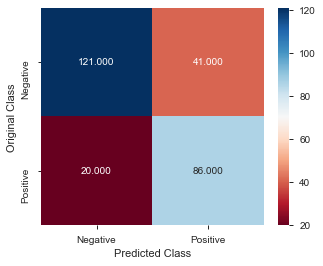

In [84]:
print('Confusion Matrix for Bag of Words with L1 regularizer')
Labels = ['Negative' , 'Positive'] 
plt.figure(figsize=(5,4))
sns.heatmap(confMulti_bow, annot=True, cmap='RdBu', fmt=".3f", xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [114]:
a = np.arange(10**-3,10,0.05)

## SVM

In [87]:
from sklearn.svm import SVC
svc = SVC( class_weight = 'balanced')

In [85]:
c = np.arange(10**-3,10,0.05)
gamma = np.arange(10**-3,1,0.01)
param_grid ={'C': c, 'gamma': gamma, 'kernel': ['rbf', 'poly','linear']}

In [88]:

clf = RandomizedSearchCV(svc, param_grid , scoring= 'accuracy', cv =k_fold, return_train_score = True,n_iter = 100, n_jobs=-1 )
clf.fit(xTrain ,yTrain)
print(clf.best_estimator_)
print(clf.score(xTrain, yTrain))

SVC(C=1.301, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.38099999999999995,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.8587479935794543


C:\Users\Alankar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
clf = SVC(C=1.301, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.38099999999999995,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
clf.fit(xTrain, yTrain)
pred= clf.predict(xTest)

In [90]:
accMulti_bow= round(accuracy_score(yTest, pred) * 100, 3)
precMulti_bow = round(precision_score(yTest, pred)  *100 ,3)
f1Multi_bow = round(f1_score(yTest, pred) *100,3)
confMulti_bow = confusion_matrix(yTest,pred)

In [91]:
table_b = PrettyTable()
table_b.add_column('Optimal Alpha' , [round(1.301)])
table_b.add_column('Accuracy', [accMulti_bow])
table_b.add_column('Precision', [precMulti_bow])
table_b.add_column('f1 score', [f1Multi_bow])
print(table_b)

+---------------+----------+-----------+----------+
| Optimal Alpha | Accuracy | Precision | f1 score |
+---------------+----------+-----------+----------+
|       1       |  78.731  |   71.304  |  74.208  |
+---------------+----------+-----------+----------+


Confusion Matrix for Bag of Words with L1 regularizer


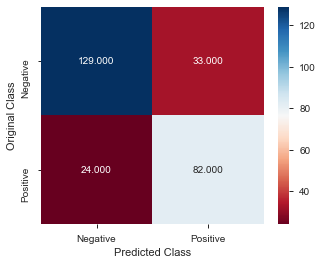

In [92]:
print('Confusion Matrix for Bag of Words with L1 regularizer')
Labels = ['Negative' , 'Positive'] 
plt.figure(figsize=(5,4))
sns.heatmap(confMulti_bow, annot=True, cmap='RdBu', fmt=".3f", xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

In [94]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

# Create the random grid
grid = {       'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [95]:
clf = RandomizedSearchCV(dt, param_distributions=grid, n_iter=1000, scoring= 'accuracy', cv =k_fold, return_train_score = True)

In [96]:
clf.fit(xTrain ,yTrain)
print(clf.best_estimator_)
print(clf.score(xTrain, yTrain))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=670,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8426966292134831


C:\Users\Alankar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [97]:
results = clf.cv_results_ 
result_ = pd.DataFrame.from_dict(results)
result_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006403,0.015214,0.000501,0.000501,5,2,auto,800,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.714286,...,0.844643,0.819964,0.853832,0.848485,0.843137,0.834225,0.846702,0.834225,0.843593,0.011445
1,0.001201,0.000400,0.000200,0.000400,5,2,sqrt,310,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.746032,...,0.857143,0.837790,0.855615,0.844920,0.836007,0.846702,0.852050,0.846702,0.849300,0.008559
2,0.000705,0.000462,0.000000,0.000000,5,2,sqrt,760,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.714286,...,0.862500,0.843137,0.871658,0.844920,0.837790,0.844920,0.857398,0.853832,0.852865,0.010637
3,0.000000,0.000000,0.000000,0.000000,10,4,auto,110,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.682540,...,0.816071,0.837790,0.843137,0.852050,0.803922,0.837790,0.819964,0.796791,0.825752,0.016687
4,0.003125,0.006250,0.000000,0.000000,2,4,auto,880,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.698413,...,0.823214,0.809269,0.848485,0.828877,0.828877,0.827094,0.791444,0.836007,0.826470,0.015472


In [98]:
result_ = result_.sort_values('param_max_depth')
test_score = list(result_.mean_test_score)
train_score = list(result_.mean_train_score)
param = list(result_.param_max_depth)

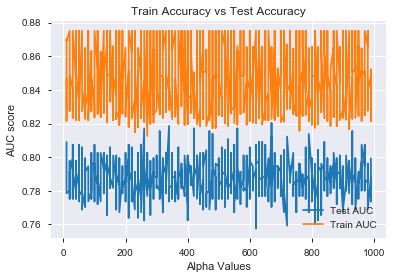

In [102]:
plt.title('Train Accuracy vs Test Accuracy')
plt.xlabel('Alpha Values')
plt.ylabel('AUC score')
plt.plot(param,test_score)
plt.plot(param, train_score)
plt.legend(['Test AUC', 'Train AUC'])
plt.show()

In [103]:
table_b = PrettyTable()
#table_b.add_column('Optimal Alpha' , [round(opt_C_1,5)])
table_b.add_column('Accuracy', [accMulti_bow])
table_b.add_column('Precision', [precMulti_bow])
table_b.add_column('f1 score', [f1Multi_bow])
print(table_b)

+----------+-----------+----------+
| Accuracy | Precision | f1 score |
+----------+-----------+----------+
|  78.731  |   71.304  |  74.208  |
+----------+-----------+----------+


In [104]:
dt =DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=670,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dt.fit(xTrain, yTrain)
pred= dt.predict(xTest)

In [105]:
accMulti_bow= round(accuracy_score(yTest, pred) * 100, 3)
precMulti_bow = round(precision_score(yTest, pred)  *100 ,3)
f1Multi_bow = round(f1_score(yTest, pred) *100,3)
confMulti_bow = confusion_matrix(yTest,pred)

In [106]:
table_b = PrettyTable()
table_b.add_column('Accuracy', [accMulti_bow])
table_b.add_column('Precision', [precMulti_bow])
table_b.add_column('f1 score', [f1Multi_bow])
print(table_b)

+----------+-----------+----------+
| Accuracy | Precision | f1 score |
+----------+-----------+----------+
|  78.358  |   72.222  |  72.897  |
+----------+-----------+----------+


Confusion Matrix for Bag of Words with L1 regularizer


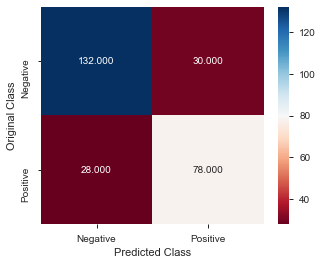

In [107]:
print('Confusion Matrix for Bag of Words with L1 regularizer')
Labels = ['Negative' , 'Positive'] 
plt.figure(figsize=(5,4))
sns.heatmap(confMulti_bow, annot=True, cmap='RdBu', fmt=".3f", xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')

In [39]:
param_grid = {'n_estimators':[x for x in range(10,1000)],'criterion':['gini', 'entropy'],'min_samples_split':[2,5,10],'min_samples_leaf':[2,5,10] }

In [42]:
clf = RandomizedSearchCV(rf, param_grid, n_iter=100, scoring= 'accuracy', cv =k_fold, return_train_score = True)
clf.fit(xTrain,yTrain)
print(clf.best_estimator_)
print(clf.score(xTrain,yTrain))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=595, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
0.8459069020866774


In [43]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=595, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [44]:
rf.fit(xTrain,yTrain)
pred = rf.predict(xTest)

In [47]:
accuracy = round(accuracy_score(yTest,pred)*100,3)
precision = round(precision_score(yTest,pred)*100,3)
F1_score = round(f1_score(yTest,pred)*100,3)
roc_auc = round(roc_auc_score(yTest,pred)*100,3)
conf = confusion_matrix(yTest,pred)

In [49]:
table = PrettyTable()
table.add_column('Number of trees',['595'])
table.add_column('Roc Auc score',[roc_auc])
table.add_column('Accuracy',[accuracy])
table.add_column('Precison',[precision])
table.add_column('F1 Score',[F1_score])
print(table)

+-----------------+---------------+----------+----------+----------+
| Number of trees | Roc Auc score | Accuracy | Precison | F1 Score |
+-----------------+---------------+----------+----------+----------+
|       595       |     82.411    |  84.328  |  85.714  |  78.788  |
+-----------------+---------------+----------+----------+----------+


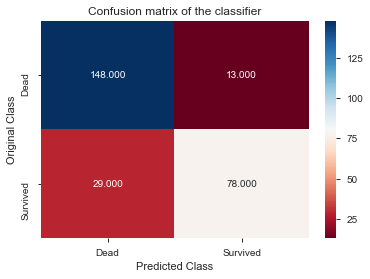

In [50]:
Labels = ['Dead' , 'Survived']
plt.title('Confusion matrix of the classifier')
sns.heatmap(conf, annot=True, cmap='RdBu', fmt=".3f", xticklabels=Labels, yticklabels=Labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# XGBoost

In [61]:
#from xgboost import XGBClassifier as xgb
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 

In [62]:
model = GradientBoostingClassifier()
model.fit(xTrain, yTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model